In [1]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.8.8


In [2]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Configuração para os gráficos largura e layout dos graficos

plt.style.use('fivethirtyeight')

In [4]:
# NLTK para NLP
import nltk
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

seaborn   : 0.11.1
plotly    : 5.6.0
pandas    : 1.2.4
re        : 2.2.1
nltk      : 3.6.1
watermark : 2.3.0
matplotlib: 3.3.4
numpy     : 1.20.1



# Base dados

In [6]:
df = pd.read_csv("Corona_NLP_train.csv")
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [7]:
# Exibido 5 primeiros dados
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
# Exibido 5 últimos dados 
df.tail(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know its getting tough when @KameronWilds...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [9]:
# Número de linhas e colunas
df.shape

(41157, 6)

In [10]:
# Verificando informações das variaveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [11]:
# Tipo dos dados
df.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [12]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(df.shape[0]))
print("Números de colunas: {}" .format(df.shape[1]))

Números de linhas: 41157
Números de colunas: 6


In [13]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", df.isnull().sum().values.sum())


Missing values :   8590


In [14]:
# Verificando o total de sentimentos
df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [15]:
# Verificando base
df.value_counts()

UserName  ScreenName  Location                      TweetAt     OriginalTweet                                                                                                                                                                                                                                                                                                       Sentiment         
3799      48751       London                        16-03-2020  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8                                                                                                                                                                                                     Neutral               1
31309     76261       Jakarta                       03-04-2020  With global panic buying, some countries moving towards food protectionism and more nations going into lockdown during the #coronavirus pandemic, foo

# Análise de dados

Text(0, 0.5, 'Total')

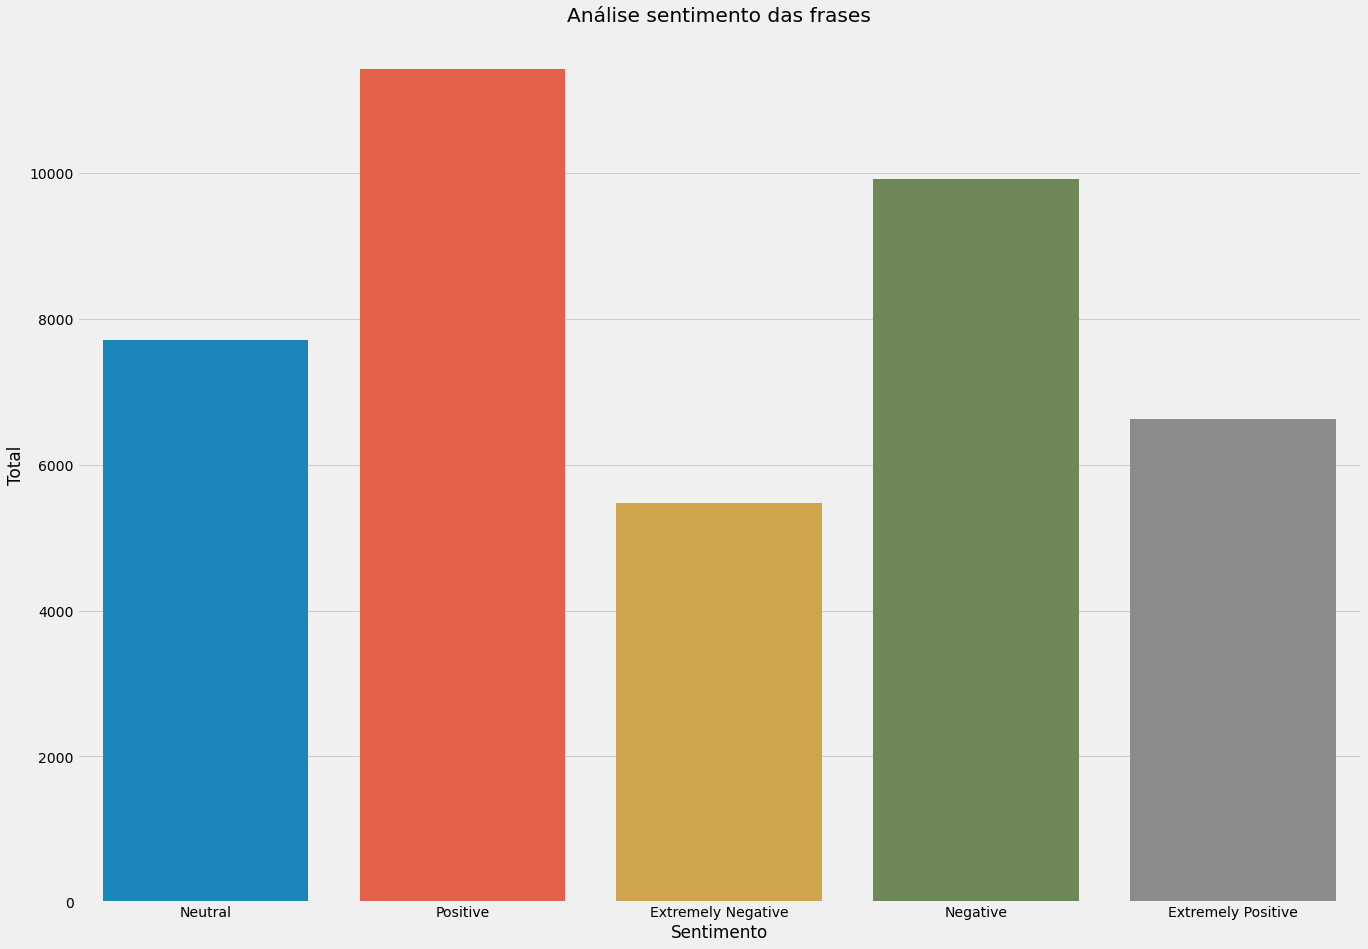

In [16]:
plt.figure(figsize=(20.5, 15))

plt.title("Análise sentimento das frases")
ax = sns.countplot(df["Sentiment"])
plt.xlabel("Sentimento")
plt.ylabel("Total")

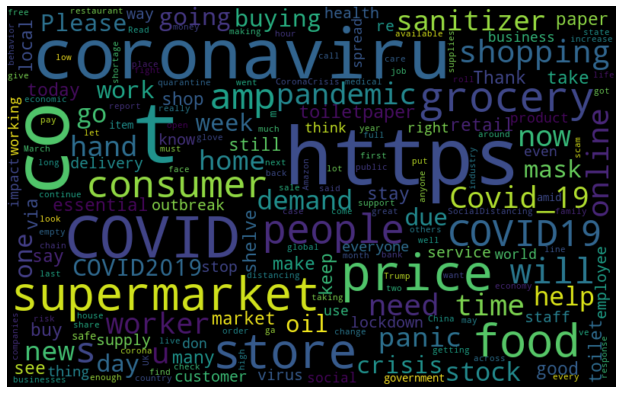

In [17]:
# Nuvem de palavras
%matplotlib inline
from wordcloud import WordCloud

todos_palavras = ' '.join([texto for texto in df["OriginalTweet"]])
nuvem_palavras = WordCloud(width = 800, height = 500, max_font_size = 110,
                          collocations = False).generate(todos_palavras)

plt.figure(figsize= (10, 7))
plt.imshow(nuvem_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# Pré - processamento

In [18]:
# Contagem de texto
df.OriginalTweet.count()

41157

In [19]:
# Dados duplicados

df.drop_duplicates(["OriginalTweet"], inplace = True)
df.OriginalTweet.count()

41157

# Treino e Teste

- Treino e teste da base de dados da coluna Review, sentimento

In [26]:
# Variável para teste
treino = df["OriginalTweet"]

# Variável para treino
teste = df["Sentiment"]

In [27]:
# Total de linhas e colunas dados variável x
treino.shape

(41157,)

In [28]:
# Total de linhas e colunas dados variável y
teste.shape

(41157,)

In [29]:
# Dados de limpeza para modelo PLN

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Removendo stop words
def remove_stop_words(instancia):
    stopwords = set(nltk.corpus.stopwords.words("english"))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

# stemming no dataset
def text_stemming(instancia):
    stemmer = nltk.stem.RSLPStemmer()

    palavras = []

    for w in instancia.split():
        palavras.append(stemmer.stem(w))
    return (" ".join(palavras))

# Limpando base de dados
def dados_limpos(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    return (instancia)

# Redução de palavras flexionadas
def Lemmatization(instancia):
    
    palavras = []
    
    for w in instancia.split():
        palavras.append(wordnet_lemmatizer.lemmatize(w))
        return (" ".join(palavras))

# Pré-processamento removendo stopword e removendo caracteres indesejados.
def Preprocessing(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

In [30]:
# Visualizando texto
treino = [Preprocessing(i) for i in treino]
treino[:20]

['@menyrbie @phil_gahan @chrisitv and and',
 'advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order',
 'coronavirus australia woolworths to give elderly, disabled dedicated shopping hours amid covid19 outbreak',
 "my food stock is not the only one which is empty please, don't panic, there will be enough food everyone if you not take more than you need stay calm, stay safe #covid19france #covid_19 #covid19 #coronavirus #confinement #confinementotal #confinementgeneral",
 "me, ready to go at supermarket during the #covid19 outbreak not because i'm paranoid, but because my food stock is litteraly empty the #coronavirus is serious thing, but please, don't panic it causes shortage #coronavirusfrance #restezchezvous #stayathome #confinement",
 'news of the region\x92s first confirmed covid19 case came out of su

# Escalonamento dos dados

In [31]:
from sklearn.preprocessing import LabelEncoder

# Nome do encoder
label = LabelEncoder()

# Transformação do dados
df["Sentiment"] = label.fit_transform(df["Sentiment"])

# Visualizção dos dados
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,scores,compound,score
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,4,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,pos
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,4,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,pos
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,4,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.8731,pos
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"{'neg': 0.079, 'neu': 0.713, 'pos': 0.208, 'co...",0.7161,pos


In [32]:
# Word tokenize - E o processo de devidir uma string, textos e uma lista tokens 
# Modelo criado para classificar tweets positivos, negativos
# CountVectorizer criar um vocabulário de palavras e retornar em vetor

# Importação da biblioteca
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import TweetTokenizer

# Nome token
tokenizer = TweetTokenizer()

# treinamento do vectorizer
vectorizer = CountVectorizer(analyzer ="word", 
                             tokenizer = tokenizer.tokenize)

# Visualizando os dados transformados para vetor
freq = vectorizer.fit_transform(treino)
freq.shape

(41157, 64409)

# Modelo Machine learning

- Modelo 01 - Naive bayes

In [33]:
# Modelo machine learning - 1

# Importação da biblioteca sklearn o modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Nome do algoritmo M.L
model_naive_bayes = MultinomialNB()

# Treinamento do modelo
model_naive_bayes_fit = model_naive_bayes.fit(freq, teste)

# Score do modelo
model_naive_bayes_score = model_naive_bayes.score(freq, teste)

print("Score - Modelo Naive bayes multinomialNB: %.2f" % (model_naive_bayes_score * 100))

Score - Modelo Naive bayes multinomialNB: 72.82


In [34]:
# Probabilidade do modelo

naive_bayes_predict = model_naive_bayes.predict_proba(freq).round(2)
naive_bayes_predict

array([[0.11, 0.05, 0.04, 0.76, 0.03],
       [0.  , 0.12, 0.01, 0.  , 0.87],
       [0.  , 0.02, 0.06, 0.  , 0.91],
       ...,
       [0.01, 0.04, 0.07, 0.  , 0.88],
       [0.01, 0.05, 0.03, 0.02, 0.9 ],
       [0.  , 0.  , 1.  , 0.  , 0.  ]])

In [35]:
# Previsão do modelo

naive_bayes_predict = model_naive_bayes.predict(freq)
naive_bayes_predict

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype='<U18')

In [36]:
# Accuracy do modelo
from sklearn.metrics import accuracy_score

accuracy_naive_bayes_multinomialNB = accuracy_score(teste, naive_bayes_predict)
print("Accuracy - Naive bayes multinomialNB: %.2f" % (accuracy_naive_bayes_multinomialNB * 100))

Accuracy - Naive bayes multinomialNB: 72.82


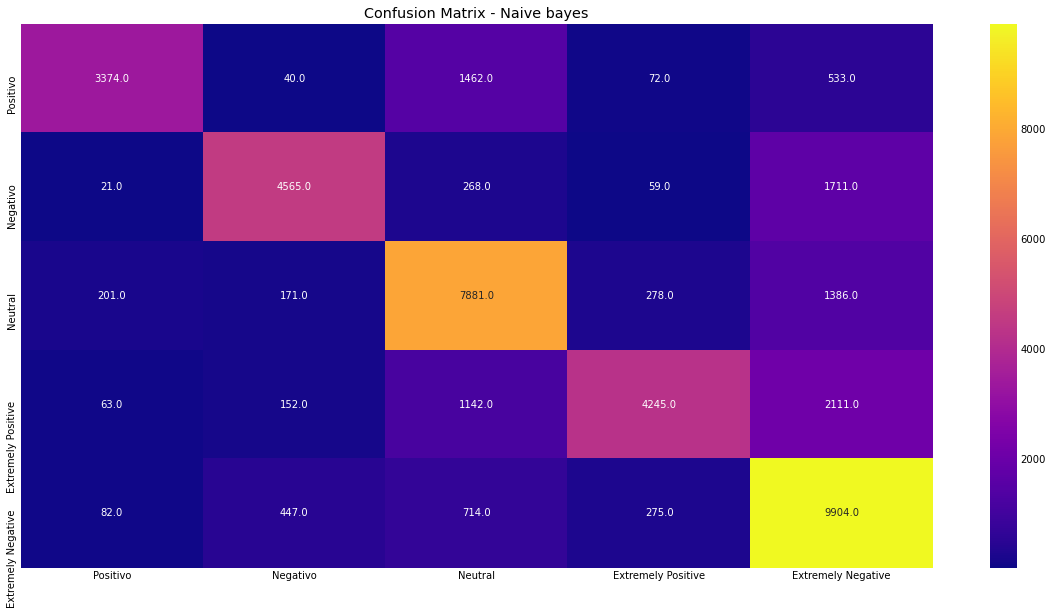

In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

matrix_confusion_1 = confusion_matrix(teste, naive_bayes_predict)

plt.figure(figsize=(18.2, 10))
ax= plt.subplot()
sns.heatmap(matrix_confusion_1, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Naive bayes'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]);

In [38]:
# Classification report do modelo
from sklearn.metrics import classification_report

classification = classification_report(teste, naive_bayes_predict)
print("Modelo 01 - Naive bayes multinomialNB")
print()
print(classification)

Modelo 01 - Naive bayes multinomialNB

                    precision    recall  f1-score   support

Extremely Negative       0.90      0.62      0.73      5481
Extremely Positive       0.85      0.69      0.76      6624
          Negative       0.69      0.79      0.74      9917
           Neutral       0.86      0.55      0.67      7713
          Positive       0.63      0.87      0.73     11422

          accuracy                           0.73     41157
         macro avg       0.79      0.70      0.73     41157
      weighted avg       0.76      0.73      0.73     41157



# Modelo 02 - Decision Tree

In [39]:
%%time

# Modelo machine learning - 2

# Importação da biblioteca sklearn o modelo Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

# Nome do algoritmo M.L
model_dtc = DecisionTreeClassifier(max_depth = 5, random_state = 0)

# Treinamento do modelo
model_dtc_fit = model_dtc.fit(freq, teste)

# Score do modelo
model_dtc_score = model_dtc.score(freq, teste)
print("Modelo - Decision Tree Classifier: %.2f" % (model_dtc_score * 100))

Modelo - Decision Tree Classifier: 32.47
Wall time: 818 ms


In [40]:
# Previsão do modelo 
modelo_arvore_cla_1_predict = model_dtc.predict(freq)
modelo_arvore_cla_1_predict

array(['Positive', 'Positive', 'Positive', ..., 'Extremely Positive',
       'Positive', 'Positive'], dtype=object)

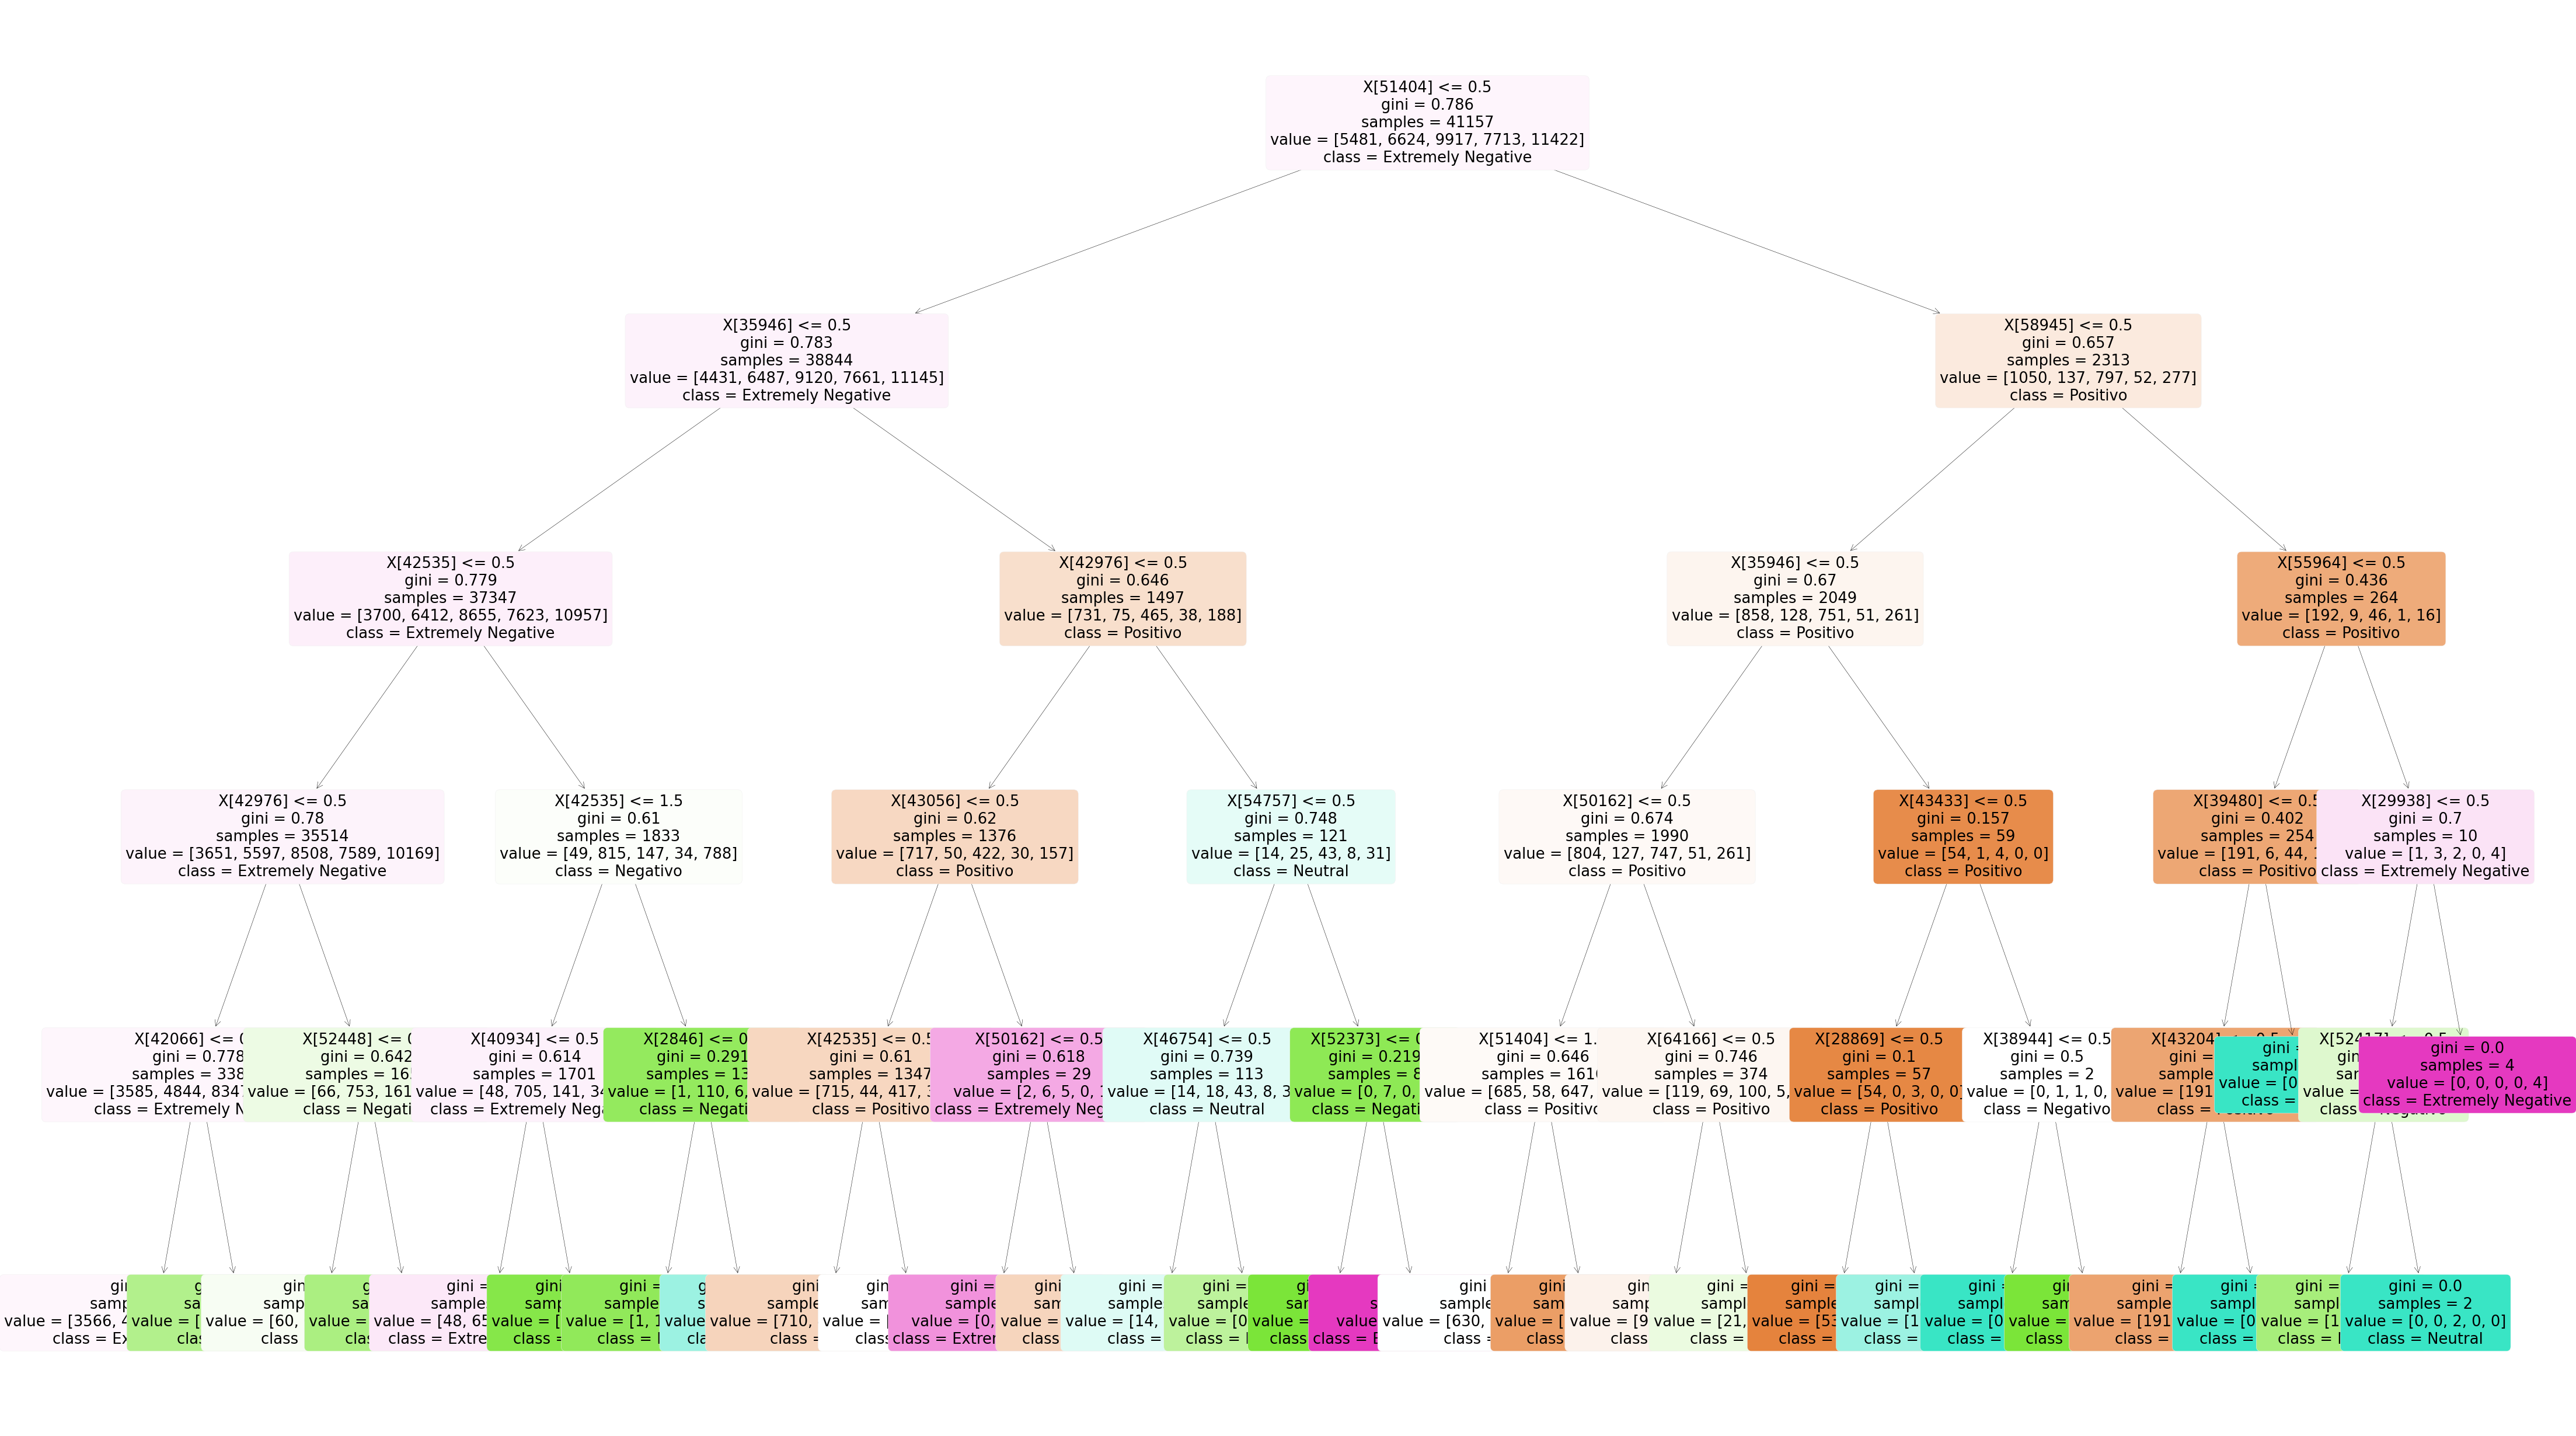

In [41]:
# Gráfico da ávore
from sklearn import tree

fig, ax = plt.subplots(figsize=(65.5, 45), facecolor = "w")

tree.plot_tree(model_dtc, 
               ax = ax, 
               fontsize = 25.8, 
               rounded = True, 
               filled = True, 
               class_names = ["Positivo", 
                              "Negativo", 
                              "Neutral", 
                              "Extremely Positive", 
                              "Extremely Negative"])
plt.show()

In [42]:
# Accuracy score
acuracia_decision_tree = accuracy_score(teste, modelo_arvore_cla_1_predict)

print("Accuracy - Decision Tree: %.2f" % (acuracia_decision_tree * 100))

Accuracy - Decision Tree: 32.47


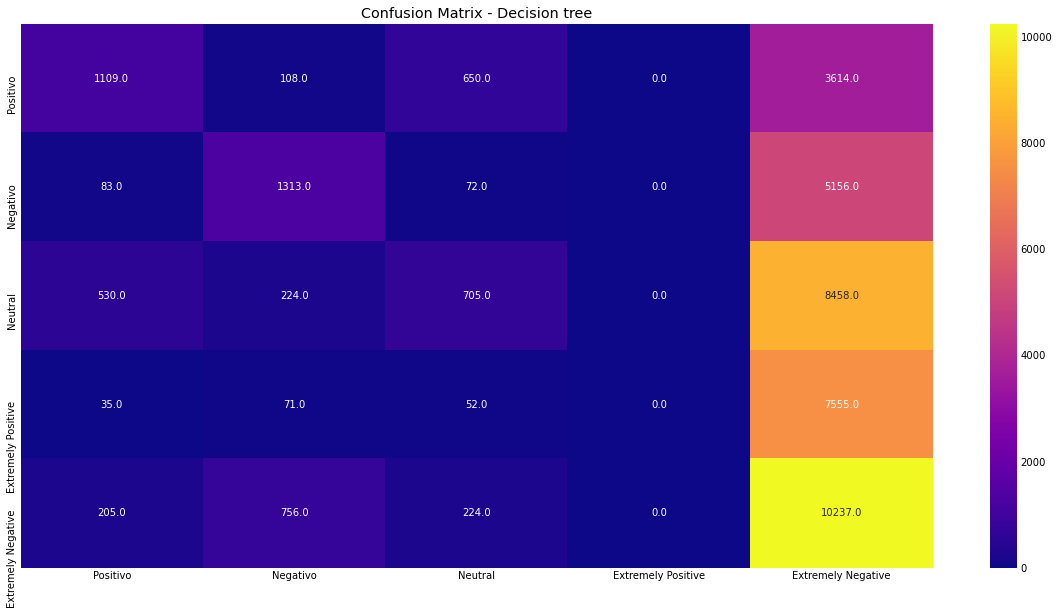

In [43]:
# Confusion matrix
matrix_confusion_2 = confusion_matrix(teste, modelo_arvore_cla_1_predict)

plt.figure(figsize=(18.2, 10))
ax= plt.subplot()
sns.heatmap(matrix_confusion_2, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]);

In [44]:
# Classification report
class_report = classification_report(teste, modelo_arvore_cla_1_predict)

print("Modelo - Decision Tree")
print("\n")
print(class_report)

Modelo - Decision Tree


                    precision    recall  f1-score   support

Extremely Negative       0.57      0.20      0.30      5481
Extremely Positive       0.53      0.20      0.29      6624
          Negative       0.41      0.07      0.12      9917
           Neutral       0.00      0.00      0.00      7713
          Positive       0.29      0.90      0.44     11422

          accuracy                           0.32     41157
         macro avg       0.36      0.27      0.23     41157
      weighted avg       0.34      0.32      0.24     41157



# Modelo 03 - Regressão logistica

In [45]:
%%time

# Importação da biblioteca sklearn o modelo Logistic Regression
from sklearn.linear_model import LogisticRegression

# Nome do algoritmo M.L
model_regression_logistic = LogisticRegression()

# Treinamento do modelo
model_regression_logistic_fit = model_regression_logistic.fit(freq, teste)

# Score do modelo
model_regression_logistic_score = model_regression_logistic.score(freq, teste)
print("Modelo - Regressão logistica: %.2f" % (model_regression_logistic_score * 100))

Modelo - Regressão logistica: 87.73
Wall time: 11.2 s


In [46]:
# Previsão do modelo
model_regression_logistic_pred = model_regression_logistic.predict(freq)
model_regression_logistic_pred

array(['Neutral', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [47]:
# Accuracy score
acuracia_Logistic_Regression = accuracy_score(teste, model_regression_logistic_pred)

print("Accuracy - Decision Tree: %.2f" % (acuracia_Logistic_Regression * 100))

Accuracy - Decision Tree: 87.73


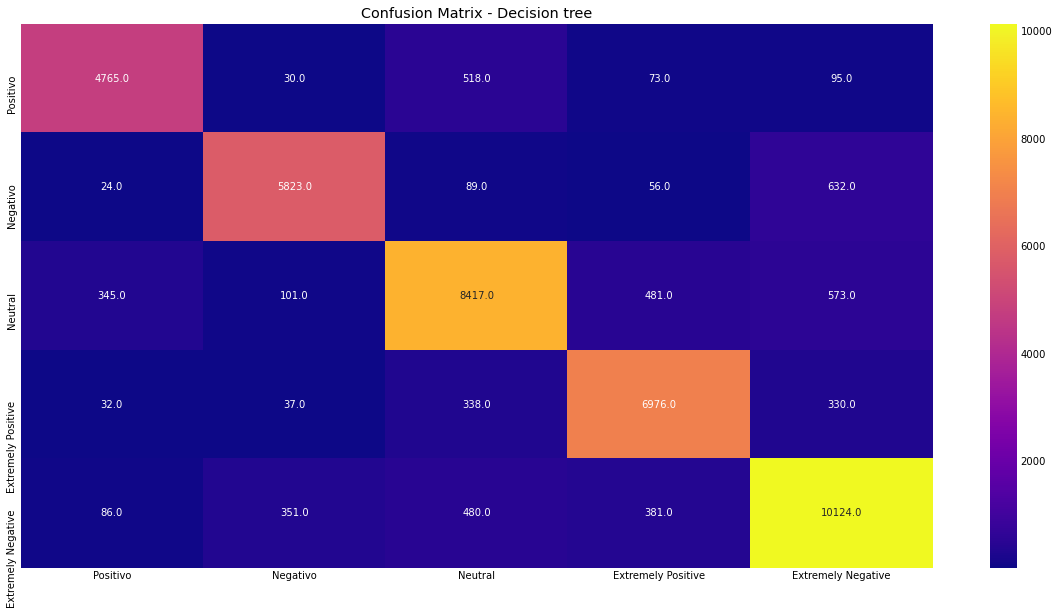

In [48]:
# Confusion matrix
matrix_confusion_3 = confusion_matrix(teste, model_regression_logistic_pred)

plt.figure(figsize=(18.2, 10))
ax= plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]);

In [49]:
# Classification report

classification = classification_report(teste, model_regression_logistic_pred)
print("Modelo 03 - Regressão logistica")
print()
print(classification)

Modelo 03 - Regressão logistica

                    precision    recall  f1-score   support

Extremely Negative       0.91      0.87      0.89      5481
Extremely Positive       0.92      0.88      0.90      6624
          Negative       0.86      0.85      0.85      9917
           Neutral       0.88      0.90      0.89      7713
          Positive       0.86      0.89      0.87     11422

          accuracy                           0.88     41157
         macro avg       0.88      0.88      0.88     41157
      weighted avg       0.88      0.88      0.88     41157



# Modelo 04 - K-NN

In [50]:
%%time
# Modelo machine learning - 4 KNN

# Importação da biblioteca sklearn o K-NN
from sklearn.neighbors import KNeighborsClassifier

# Nome do algoritmo M.L
model_knn = KNeighborsClassifier()

# Treinamento do modelo
model_knn_fit = model_knn.fit(freq, teste)

# Score do modelo
model_knn_score = model_knn.score(freq, teste)
print("Modelo - K-NN: %.2f" % (model_knn_score * 100))

Modelo - K-NN: 44.31
Wall time: 1min 43s


In [51]:
# Previsão do modelo do k-nn

model_knn_pred = model_knn.predict(freq)
model_knn_pred

array(['Neutral', 'Neutral', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [52]:
# Accuracy modelo KNN
accuracy_knn = accuracy_score(teste, model_knn_pred)

print("Acurácia - K-NN: %.2f" % (accuracy_knn * 100))

Acurácia - K-NN: 44.31


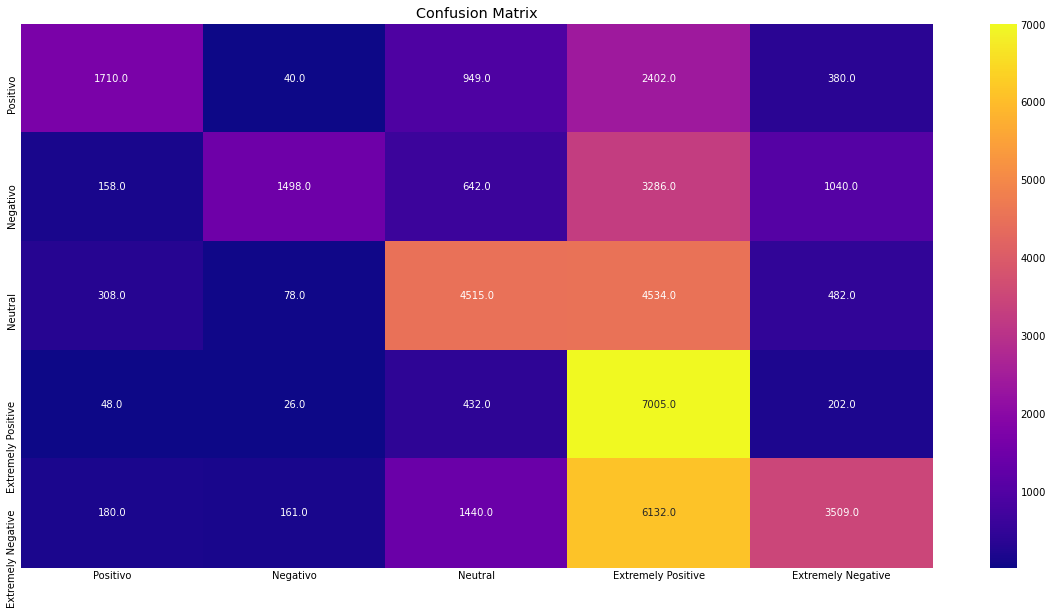

In [53]:
# Matrix confusion 
matrix_confusion_3 = confusion_matrix(teste, model_knn_pred)

plt.figure(figsize=(18.2, 10))
ax= plt.subplot()
sns.heatmap(matrix_confusion_3, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma'); 

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]);

In [54]:
# Classification report

classification = classification_report(teste, model_knn_pred)
print("Modelo 04 - K-NN")
print()
print(classification)

Modelo 04 - K-NN

                    precision    recall  f1-score   support

Extremely Negative       0.71      0.31      0.43      5481
Extremely Positive       0.83      0.23      0.36      6624
          Negative       0.57      0.46      0.50      9917
           Neutral       0.30      0.91      0.45      7713
          Positive       0.63      0.31      0.41     11422

          accuracy                           0.44     41157
         macro avg       0.61      0.44      0.43     41157
      weighted avg       0.59      0.44      0.44     41157



# Modelo 05 - Random forest

In [55]:
%%time
# Modelo machine learning - 5

# Importação da biblioteca sklearn o modelo random forest
from sklearn.ensemble import RandomForestClassifier

# Importação da biblioteca sklearn o modelo Random Forest
model_random_forest = RandomForestClassifier(max_depth = 2, random_state = 0) # max_depth - determinando total de árvore, random_state 0

# Treinamento do modelo
model_random_forest_fit = model_random_forest.fit(freq, teste) # Dados de treino, teste de x, y

# Score do modelo
model_random_forest_score = model_random_forest.score(freq, teste) # Valor da Accuracy do algoritmo 

print("Score - Modelo random forest: %.2f" % (model_random_forest_score * 100))

Score - Modelo random forest: 27.75
Wall time: 2.04 s


In [56]:
# Previsão do modelo
model_random_forest_regressor_pred = model_random_forest.predict(freq)
model_random_forest_regressor_pred

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [57]:
# Accuracy_score modelo

accuracy_random_forest = accuracy_score(teste, model_random_forest_regressor_pred)
print("Accuracy - Random forest: %.2f" % (accuracy_random_forest * 100))

Accuracy - Random forest: 27.75


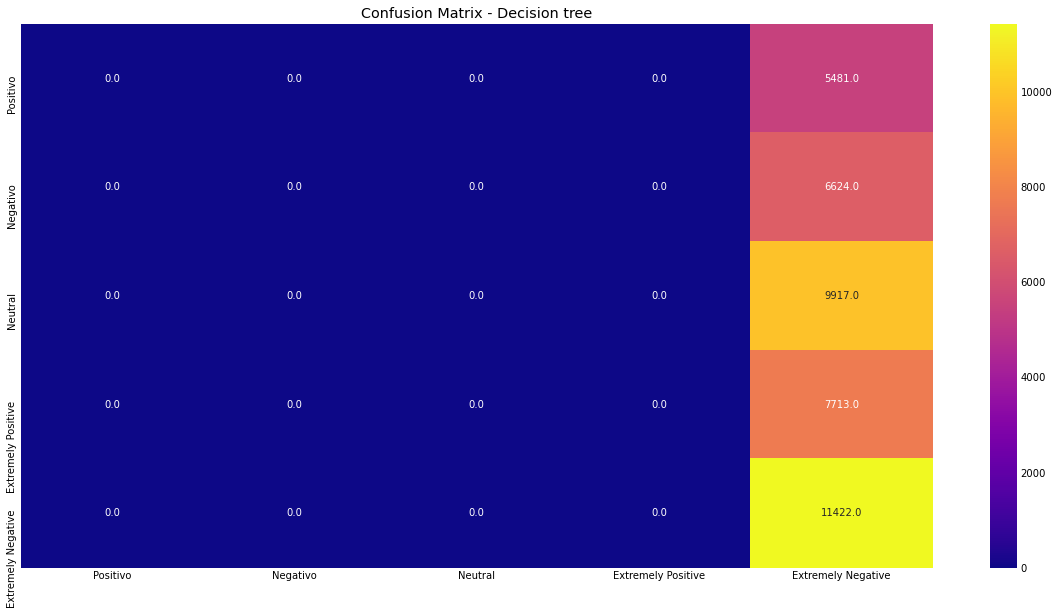

In [58]:
# Confusion matrix

matrix_confusion_4 = confusion_matrix(teste, model_random_forest_regressor_pred)
plt.figure(figsize=(18.2, 10))
ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma');

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]);

In [59]:
# Classification report
from sklearn.metrics import classification_report

classification = classification_report(teste, model_random_forest_regressor_pred)
print("Modelo 05 - Random forest")
print()
print(classification)

Modelo 05 - Random forest

                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00      5481
Extremely Positive       0.00      0.00      0.00      6624
          Negative       0.00      0.00      0.00      9917
           Neutral       0.00      0.00      0.00      7713
          Positive       0.28      1.00      0.43     11422

          accuracy                           0.28     41157
         macro avg       0.06      0.20      0.09     41157
      weighted avg       0.08      0.28      0.12     41157



# Modelo 06 - XGBOOST

In [60]:
# Modelo 06 - XGBosst 

# Importação da biblioteca sklearn o modelo XGBoost
from xgboost import XGBClassifier

# Nome do algoritmo M.L
xgb = XGBClassifier()

# Treinamento do modelo
xgb_fit = xgb.fit(freq, teste)

# Score do modelo
xgb_score = xgb.score(freq, teste)
print("Modelo - XGBoost: %.2f" % (xgb_score * 100))

[23:53:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Modelo - XGBoost: 71.19


In [61]:
# Previsão do modelo

xgb_pred = xgb.predict(freq)
xgb_pred

array(['Neutral', 'Positive', 'Neutral', ..., 'Positive', 'Positive',
       'Negative'], dtype=object)

In [62]:
# Accuracy score do modelo

accuracy_XGBoost = accuracy_score(teste, xgb_pred)
print("Accuracy - XGBoost: %.2f" % (accuracy_XGBoost * 100))

Accuracy - XGBoost: 71.19


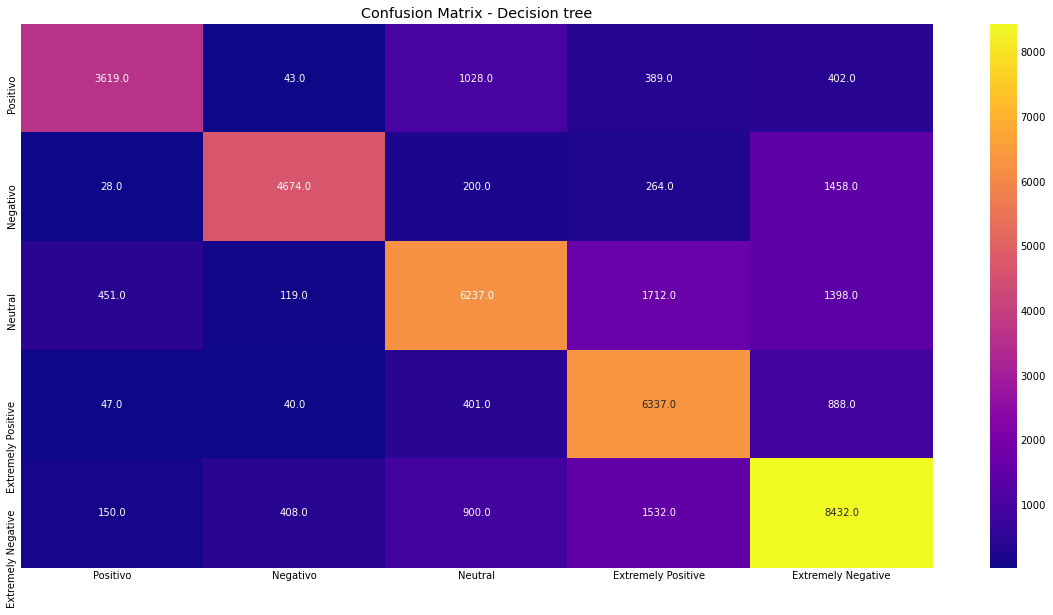

In [63]:
# Confusion matrix
matrix_confusion_4 = confusion_matrix(teste, xgb_pred)

plt.figure(figsize=(18.2, 10))
ax = plt.subplot()
sns.heatmap(matrix_confusion_4, annot=True, ax = ax, fmt = ".1f", cmap = 'plasma');

ax.set_xlabel('');
ax.set_ylabel(''); 
ax.set_title('Confusion Matrix - Decision tree'); 
ax.xaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]); ax.yaxis.set_ticklabels(["Positivo", "Negativo", "Neutral", "Extremely Positive", "Extremely Negative"]);

In [64]:
classification = classification_report(teste, xgb_pred)
print("Modelo 05 - Random forest")
print()
print(classification)

Modelo 05 - Random forest

                    precision    recall  f1-score   support

Extremely Negative       0.84      0.66      0.74      5481
Extremely Positive       0.88      0.71      0.79      6624
          Negative       0.71      0.63      0.67      9917
           Neutral       0.62      0.82      0.71      7713
          Positive       0.67      0.74      0.70     11422

          accuracy                           0.71     41157
         macro avg       0.75      0.71      0.72     41157
      weighted avg       0.73      0.71      0.71     41157



In [65]:
# Resultados - Modelos machine learning

modelos = pd.DataFrame({
    
    "Models" :["Regressão logistica", 
                "K-NN", 
                "Random Forest", 
                "Decision Tree",
                "Naive Bayes",
                "XGBoost"],

    "Acurácia" :[accuracy_naive_bayes_multinomialNB, 
                      acuracia_decision_tree, 
                      acuracia_Logistic_Regression, 
                      accuracy_knn,
                      accuracy_random_forest,
                      accuracy_XGBoost]})

modelos.sort_values(by = "Acurácia", ascending = False)

,Models,Acurácia
2,Random Forest,0.877251
0,Regressão logistica,0.728163
5,XGBoost,0.711884
3,Decision Tree,0.443108
1,K-NN,0.324708
4,Naive Bayes,0.277523


In [66]:
## Salvando modelo M.L PLN

import pickle
 
with open('naive_bayes_predict.pkl', 'wb') as file:
    pickle.dump(naive_bayes_predict, file)

with open('modelo_arvore_cla_1_predict.pkl', 'wb') as file:
    pickle.dump(modelo_arvore_cla_1_predict, file)

with open('model_regression_logistic_pred.pkl', 'wb') as file:
    pickle.dump(model_regression_logistic_pred, file)

with open('model_knn_pred.pkl', 'wb') as file:
    pickle.dump(model_knn_pred, file)

with open('model_random_forest_regressor_pred.pkl', 'wb') as file:
    pickle.dump(model_random_forest_regressor_pred, file)

with open('xgb_pred.pkl', 'wb') as file:
    pickle.dump(xgb_pred, file)

# Análise sentimento nas frases com vader

In [68]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

model_sid = SentimentIntensityAnalyzer()
model_sid.polarity_scores(df.iloc[0]['OriginalTweet'])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [69]:
df['scores'] = df['OriginalTweet'].apply(lambda review:model_sid.polarity_scores(review))
df['compound'] = df['scores'].apply(lambda d:d['compound'])
df['score'] = df['compound'].apply(lambda score: 'pos' if score >=0 else 'neg')

df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,scores,compound,score
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,4,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2500,pos
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,4,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp...",0.4588,pos
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,4,"{'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'comp...",0.8731,pos
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",0,"{'neg': 0.079, 'neu': 0.713, 'pos': 0.208, 'co...",0.7161,pos
